# Losgistic regression (로지스틱 회귀)

1.Linear regression에서는 linear function(y=W*x+b)이 가설함수(hypothesis)로 쓰인다.<br>
2.Linear regression에서의 문제점은 아래와 같이 데이터가 비선형적으로 분포되어있을때 regression하기 힘들다는 것이다<br>
3.이런경우 가설함수(hypothesis)를 logistic function을 이용하게 되면 좀더 데이터를 잘 표현하는 regression 모델을 만들 수 있다.<br>
4.Logistic regression은 logistic function을 가설함수(hypothesis)로 사용하는 regression 모델이다. <br>

$$ sigmoid_ w (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^-(w^Tx) }  $$ 

<img src="figure/2.png"> 
<br>
<a href="https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python">figure1.Difference between linear and logistic regression</a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

<br>

* 신경망 모델을 정의한다
* 가설(hypothesis)함수를 logistic function으로 설정한다.

$$ logistic function = sigmoid_ w (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^-(w^Tx) }  $$ 

In [8]:
# Define model and Loss
class Model(object):
    def __init__(self):
        self.W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
        self.b = tf.Variable(tf.zeros([1]))

    def __call__(self, inputs):
        return tf.sigmoid(self.W * inputs + self.b)

<br>

* loss함수는 cross-entropy를 사용한다.

In [9]:
def compute_loss(y_data, y_pred):
    return tf.reduce_mean(tf.losses.binary_crossentropy(y_data, y_pred)) #reduce_mean 평균계산 함수/ 

<br>

* 학습데이터를 만들어준다

In [10]:
num_points1 = 10
x_data = np.arange(1,num_points1+1) #x데이터를 1~1000까지 오름차순으로 생성, x_data=[1,2,3,..,1000]
x_data = tf.convert_to_tensor(x_data)
x_data = tf.cast(x_data, tf.float32)

y_data1 = tf.fill([5],0.)
y_data2 = tf.fill([5],1.)
y_data = tf.concat([y_data1, y_data2], 0)
print(x_data.shape)
print(y_data.shape)
print(x_data.numpy)
print(y_data.numpy)


(10,)
(10,)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>>
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>>


In [11]:
#신경망 생성
model = Model()

<br>

* 학습데이터는 'bo' blue&circle 형태로 보여주고
* 신경망결과는 'r--' red&dotted line 형태로 보여준다

In [12]:
def plot(epoch):
    # Extract more x_data between x_data min and x_data max
    x_data_min, x_data_max = 1, 10
    x_data_new = np.linspace(x_data_min, x_data_max, 300)

    plt.plot(x_data, y_data, 'bo')
    plt.plot(x_data_new, model(x_data_new),'r--')
    plt.title("epoch %2d, loss = %s" %(epoch, str(compute_loss(y_data, model(x_data)).numpy())))
    plt.show()

<br> 

* 학습 알고리즘을 설정해준다.

=> epoch  1: , w_pred= 0.67;  b_pred= 0.10, loss= 1.71


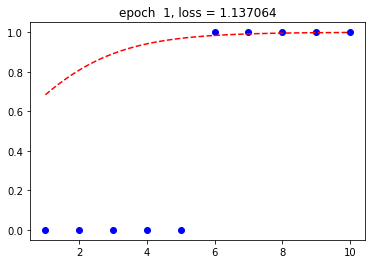

=> epoch  2: , w_pred= 0.27;  b_pred= -0.02, loss= 1.14
=> epoch  3: , w_pred= 0.07;  b_pred= -0.11, loss= 0.65
=> epoch  4: , w_pred= 0.29;  b_pred= -0.13, loss= 0.62
=> epoch  5: , w_pred= 0.09;  b_pred= -0.21, loss= 0.63
=> epoch  6: , w_pred= 0.30;  b_pred= -0.23, loss= 0.60
=> epoch  7: , w_pred= 0.11;  b_pred= -0.32, loss= 0.61
=> epoch  8: , w_pred= 0.31;  b_pred= -0.34, loss= 0.58
=> epoch  9: , w_pred= 0.13;  b_pred= -0.41, loss= 0.58
=> epoch 10: , w_pred= 0.31;  b_pred= -0.44, loss= 0.56
=> epoch 11: , w_pred= 0.15;  b_pred= -0.51, loss= 0.56
=> epoch 12: , w_pred= 0.32;  b_pred= -0.53, loss= 0.54
=> epoch 13: , w_pred= 0.17;  b_pred= -0.60, loss= 0.54
=> epoch 14: , w_pred= 0.32;  b_pred= -0.62, loss= 0.52
=> epoch 15: , w_pred= 0.19;  b_pred= -0.69, loss= 0.52
=> epoch 16: , w_pred= 0.33;  b_pred= -0.71, loss= 0.51
=> epoch 17: , w_pred= 0.21;  b_pred= -0.78, loss= 0.51
=> epoch 18: , w_pred= 0.33;  b_pred= -0.80, loss= 0.49
=> epoch 19: , w_pred= 0.23;  b_pred= -0.86, los

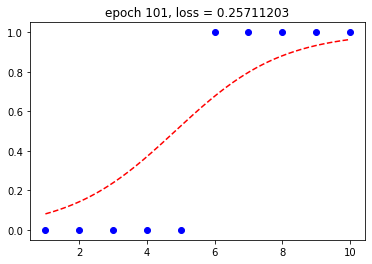

=> epoch 102: , w_pred= 0.64;  b_pred= -3.08, loss= 0.26
=> epoch 103: , w_pred= 0.64;  b_pred= -3.10, loss= 0.26
=> epoch 104: , w_pred= 0.64;  b_pred= -3.11, loss= 0.25
=> epoch 105: , w_pred= 0.64;  b_pred= -3.13, loss= 0.25
=> epoch 106: , w_pred= 0.65;  b_pred= -3.15, loss= 0.25
=> epoch 107: , w_pred= 0.65;  b_pred= -3.17, loss= 0.25
=> epoch 108: , w_pred= 0.65;  b_pred= -3.19, loss= 0.25
=> epoch 109: , w_pred= 0.66;  b_pred= -3.20, loss= 0.25
=> epoch 110: , w_pred= 0.66;  b_pred= -3.22, loss= 0.25
=> epoch 111: , w_pred= 0.66;  b_pred= -3.24, loss= 0.25
=> epoch 112: , w_pred= 0.67;  b_pred= -3.25, loss= 0.25
=> epoch 113: , w_pred= 0.67;  b_pred= -3.27, loss= 0.25
=> epoch 114: , w_pred= 0.67;  b_pred= -3.29, loss= 0.24
=> epoch 115: , w_pred= 0.67;  b_pred= -3.30, loss= 0.24
=> epoch 116: , w_pred= 0.68;  b_pred= -3.32, loss= 0.24
=> epoch 117: , w_pred= 0.68;  b_pred= -3.34, loss= 0.24
=> epoch 118: , w_pred= 0.68;  b_pred= -3.35, loss= 0.24
=> epoch 119: , w_pred= 0.68;  

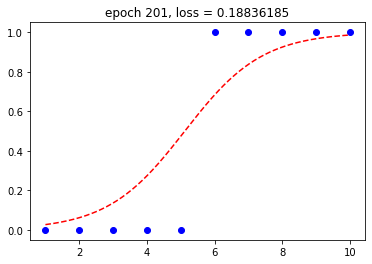

=> epoch 202: , w_pred= 0.87;  b_pred= -4.47, loss= 0.19
=> epoch 203: , w_pred= 0.88;  b_pred= -4.49, loss= 0.19
=> epoch 204: , w_pred= 0.88;  b_pred= -4.50, loss= 0.19
=> epoch 205: , w_pred= 0.88;  b_pred= -4.51, loss= 0.19
=> epoch 206: , w_pred= 0.88;  b_pred= -4.52, loss= 0.19
=> epoch 207: , w_pred= 0.88;  b_pred= -4.53, loss= 0.19
=> epoch 208: , w_pred= 0.88;  b_pred= -4.54, loss= 0.19
=> epoch 209: , w_pred= 0.89;  b_pred= -4.55, loss= 0.19
=> epoch 210: , w_pred= 0.89;  b_pred= -4.56, loss= 0.19
=> epoch 211: , w_pred= 0.89;  b_pred= -4.57, loss= 0.18
=> epoch 212: , w_pred= 0.89;  b_pred= -4.58, loss= 0.18
=> epoch 213: , w_pred= 0.89;  b_pred= -4.59, loss= 0.18
=> epoch 214: , w_pred= 0.90;  b_pred= -4.60, loss= 0.18
=> epoch 215: , w_pred= 0.90;  b_pred= -4.61, loss= 0.18
=> epoch 216: , w_pred= 0.90;  b_pred= -4.63, loss= 0.18
=> epoch 217: , w_pred= 0.90;  b_pred= -4.64, loss= 0.18
=> epoch 218: , w_pred= 0.90;  b_pred= -4.65, loss= 0.18
=> epoch 219: , w_pred= 0.90;  

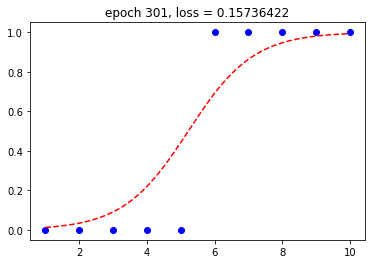

=> epoch 302: , w_pred= 1.04;  b_pred= -5.42, loss= 0.16
=> epoch 303: , w_pred= 1.04;  b_pred= -5.43, loss= 0.16
=> epoch 304: , w_pred= 1.04;  b_pred= -5.44, loss= 0.16
=> epoch 305: , w_pred= 1.04;  b_pred= -5.44, loss= 0.16
=> epoch 306: , w_pred= 1.04;  b_pred= -5.45, loss= 0.16
=> epoch 307: , w_pred= 1.04;  b_pred= -5.46, loss= 0.16
=> epoch 308: , w_pred= 1.05;  b_pred= -5.47, loss= 0.16
=> epoch 309: , w_pred= 1.05;  b_pred= -5.48, loss= 0.16
=> epoch 310: , w_pred= 1.05;  b_pred= -5.48, loss= 0.16
=> epoch 311: , w_pred= 1.05;  b_pred= -5.49, loss= 0.16
=> epoch 312: , w_pred= 1.05;  b_pred= -5.50, loss= 0.16
=> epoch 313: , w_pred= 1.05;  b_pred= -5.51, loss= 0.15
=> epoch 314: , w_pred= 1.05;  b_pred= -5.52, loss= 0.15
=> epoch 315: , w_pred= 1.06;  b_pred= -5.52, loss= 0.15
=> epoch 316: , w_pred= 1.06;  b_pred= -5.53, loss= 0.15
=> epoch 317: , w_pred= 1.06;  b_pred= -5.54, loss= 0.15
=> epoch 318: , w_pred= 1.06;  b_pred= -5.55, loss= 0.15
=> epoch 319: , w_pred= 1.06;  

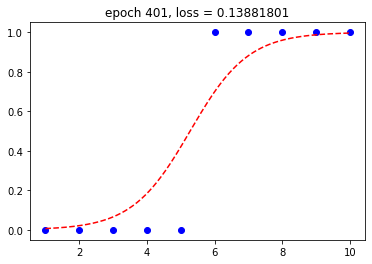

=> epoch 402: , w_pred= 1.17;  b_pred= -6.15, loss= 0.14
=> epoch 403: , w_pred= 1.17;  b_pred= -6.16, loss= 0.14
=> epoch 404: , w_pred= 1.17;  b_pred= -6.16, loss= 0.14
=> epoch 405: , w_pred= 1.17;  b_pred= -6.17, loss= 0.14
=> epoch 406: , w_pred= 1.17;  b_pred= -6.18, loss= 0.14
=> epoch 407: , w_pred= 1.17;  b_pred= -6.18, loss= 0.14
=> epoch 408: , w_pred= 1.17;  b_pred= -6.19, loss= 0.14
=> epoch 409: , w_pred= 1.17;  b_pred= -6.20, loss= 0.14
=> epoch 410: , w_pred= 1.17;  b_pred= -6.20, loss= 0.14
=> epoch 411: , w_pred= 1.18;  b_pred= -6.21, loss= 0.14
=> epoch 412: , w_pred= 1.18;  b_pred= -6.22, loss= 0.14
=> epoch 413: , w_pred= 1.18;  b_pred= -6.22, loss= 0.14
=> epoch 414: , w_pred= 1.18;  b_pred= -6.23, loss= 0.14
=> epoch 415: , w_pred= 1.18;  b_pred= -6.24, loss= 0.14
=> epoch 416: , w_pred= 1.18;  b_pred= -6.24, loss= 0.14
=> epoch 417: , w_pred= 1.18;  b_pred= -6.25, loss= 0.14
=> epoch 418: , w_pred= 1.18;  b_pred= -6.26, loss= 0.14
=> epoch 419: , w_pred= 1.18;  

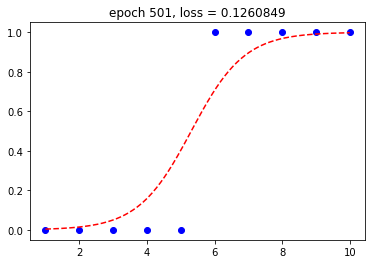

=> epoch 502: , w_pred= 1.27;  b_pred= -6.76, loss= 0.13
=> epoch 503: , w_pred= 1.27;  b_pred= -6.76, loss= 0.13
=> epoch 504: , w_pred= 1.27;  b_pred= -6.77, loss= 0.13
=> epoch 505: , w_pred= 1.28;  b_pred= -6.78, loss= 0.13
=> epoch 506: , w_pred= 1.28;  b_pred= -6.78, loss= 0.13
=> epoch 507: , w_pred= 1.28;  b_pred= -6.79, loss= 0.13
=> epoch 508: , w_pred= 1.28;  b_pred= -6.79, loss= 0.13
=> epoch 509: , w_pred= 1.28;  b_pred= -6.80, loss= 0.13
=> epoch 510: , w_pred= 1.28;  b_pred= -6.80, loss= 0.13
=> epoch 511: , w_pred= 1.28;  b_pred= -6.81, loss= 0.13
=> epoch 512: , w_pred= 1.28;  b_pred= -6.81, loss= 0.13
=> epoch 513: , w_pred= 1.28;  b_pred= -6.82, loss= 0.12
=> epoch 514: , w_pred= 1.28;  b_pred= -6.83, loss= 0.12
=> epoch 515: , w_pred= 1.28;  b_pred= -6.83, loss= 0.12
=> epoch 516: , w_pred= 1.29;  b_pred= -6.84, loss= 0.12
=> epoch 517: , w_pred= 1.29;  b_pred= -6.84, loss= 0.12
=> epoch 518: , w_pred= 1.29;  b_pred= -6.85, loss= 0.12
=> epoch 519: , w_pred= 1.29;  

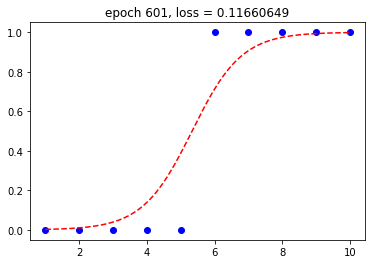

=> epoch 602: , w_pred= 1.36;  b_pred= -7.28, loss= 0.12
=> epoch 603: , w_pred= 1.37;  b_pred= -7.29, loss= 0.12
=> epoch 604: , w_pred= 1.37;  b_pred= -7.29, loss= 0.12
=> epoch 605: , w_pred= 1.37;  b_pred= -7.30, loss= 0.12
=> epoch 606: , w_pred= 1.37;  b_pred= -7.30, loss= 0.12
=> epoch 607: , w_pred= 1.37;  b_pred= -7.31, loss= 0.12
=> epoch 608: , w_pred= 1.37;  b_pred= -7.31, loss= 0.12
=> epoch 609: , w_pred= 1.37;  b_pred= -7.32, loss= 0.12
=> epoch 610: , w_pred= 1.37;  b_pred= -7.32, loss= 0.12
=> epoch 611: , w_pred= 1.37;  b_pred= -7.33, loss= 0.12
=> epoch 612: , w_pred= 1.37;  b_pred= -7.33, loss= 0.12
=> epoch 613: , w_pred= 1.37;  b_pred= -7.34, loss= 0.12
=> epoch 614: , w_pred= 1.38;  b_pred= -7.34, loss= 0.12
=> epoch 615: , w_pred= 1.38;  b_pred= -7.35, loss= 0.12
=> epoch 616: , w_pred= 1.38;  b_pred= -7.35, loss= 0.12
=> epoch 617: , w_pred= 1.38;  b_pred= -7.36, loss= 0.12
=> epoch 618: , w_pred= 1.38;  b_pred= -7.36, loss= 0.12
=> epoch 619: , w_pred= 1.38;  

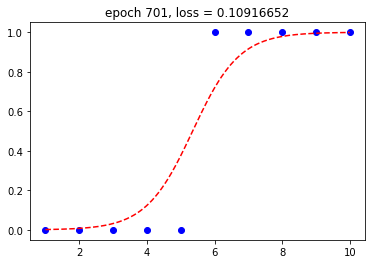

=> epoch 702: , w_pred= 1.45;  b_pred= -7.75, loss= 0.11
=> epoch 703: , w_pred= 1.45;  b_pred= -7.75, loss= 0.11
=> epoch 704: , w_pred= 1.45;  b_pred= -7.76, loss= 0.11
=> epoch 705: , w_pred= 1.45;  b_pred= -7.76, loss= 0.11
=> epoch 706: , w_pred= 1.45;  b_pred= -7.76, loss= 0.11
=> epoch 707: , w_pred= 1.45;  b_pred= -7.77, loss= 0.11
=> epoch 708: , w_pred= 1.45;  b_pred= -7.77, loss= 0.11
=> epoch 709: , w_pred= 1.45;  b_pred= -7.78, loss= 0.11
=> epoch 710: , w_pred= 1.45;  b_pred= -7.78, loss= 0.11
=> epoch 711: , w_pred= 1.45;  b_pred= -7.79, loss= 0.11
=> epoch 712: , w_pred= 1.45;  b_pred= -7.79, loss= 0.11
=> epoch 713: , w_pred= 1.46;  b_pred= -7.80, loss= 0.11
=> epoch 714: , w_pred= 1.46;  b_pred= -7.80, loss= 0.11
=> epoch 715: , w_pred= 1.46;  b_pred= -7.80, loss= 0.11
=> epoch 716: , w_pred= 1.46;  b_pred= -7.81, loss= 0.11
=> epoch 717: , w_pred= 1.46;  b_pred= -7.81, loss= 0.11
=> epoch 718: , w_pred= 1.46;  b_pred= -7.82, loss= 0.11
=> epoch 719: , w_pred= 1.46;  

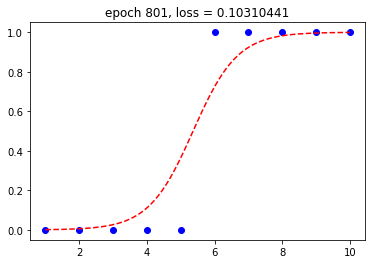

=> epoch 802: , w_pred= 1.52;  b_pred= -8.17, loss= 0.10
=> epoch 803: , w_pred= 1.52;  b_pred= -8.17, loss= 0.10
=> epoch 804: , w_pred= 1.52;  b_pred= -8.17, loss= 0.10
=> epoch 805: , w_pred= 1.52;  b_pred= -8.18, loss= 0.10
=> epoch 806: , w_pred= 1.52;  b_pred= -8.18, loss= 0.10
=> epoch 807: , w_pred= 1.53;  b_pred= -8.19, loss= 0.10
=> epoch 808: , w_pred= 1.53;  b_pred= -8.19, loss= 0.10
=> epoch 809: , w_pred= 1.53;  b_pred= -8.19, loss= 0.10
=> epoch 810: , w_pred= 1.53;  b_pred= -8.20, loss= 0.10
=> epoch 811: , w_pred= 1.53;  b_pred= -8.20, loss= 0.10
=> epoch 812: , w_pred= 1.53;  b_pred= -8.21, loss= 0.10
=> epoch 813: , w_pred= 1.53;  b_pred= -8.21, loss= 0.10
=> epoch 814: , w_pred= 1.53;  b_pred= -8.21, loss= 0.10
=> epoch 815: , w_pred= 1.53;  b_pred= -8.22, loss= 0.10
=> epoch 816: , w_pred= 1.53;  b_pred= -8.22, loss= 0.10
=> epoch 817: , w_pred= 1.53;  b_pred= -8.23, loss= 0.10
=> epoch 818: , w_pred= 1.53;  b_pred= -8.23, loss= 0.10
=> epoch 819: , w_pred= 1.53;  

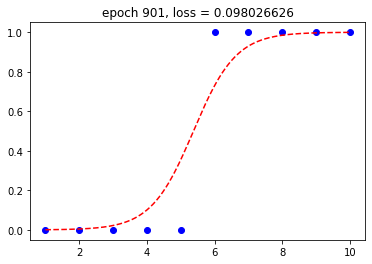

=> epoch 902: , w_pred= 1.59;  b_pred= -8.55, loss= 0.10
=> epoch 903: , w_pred= 1.59;  b_pred= -8.55, loss= 0.10
=> epoch 904: , w_pred= 1.59;  b_pred= -8.56, loss= 0.10
=> epoch 905: , w_pred= 1.59;  b_pred= -8.56, loss= 0.10
=> epoch 906: , w_pred= 1.59;  b_pred= -8.57, loss= 0.10
=> epoch 907: , w_pred= 1.59;  b_pred= -8.57, loss= 0.10
=> epoch 908: , w_pred= 1.59;  b_pred= -8.57, loss= 0.10
=> epoch 909: , w_pred= 1.59;  b_pred= -8.58, loss= 0.10
=> epoch 910: , w_pred= 1.60;  b_pred= -8.58, loss= 0.10
=> epoch 911: , w_pred= 1.60;  b_pred= -8.58, loss= 0.10
=> epoch 912: , w_pred= 1.60;  b_pred= -8.59, loss= 0.10
=> epoch 913: , w_pred= 1.60;  b_pred= -8.59, loss= 0.10
=> epoch 914: , w_pred= 1.60;  b_pred= -8.59, loss= 0.10
=> epoch 915: , w_pred= 1.60;  b_pred= -8.60, loss= 0.10
=> epoch 916: , w_pred= 1.60;  b_pred= -8.60, loss= 0.10
=> epoch 917: , w_pred= 1.60;  b_pred= -8.61, loss= 0.10
=> epoch 918: , w_pred= 1.60;  b_pred= -8.61, loss= 0.10
=> epoch 919: , w_pred= 1.60;  

In [13]:
# Define a training loop
learning_rate = 0.3
for epoch in range(1000):
    with tf.GradientTape() as tape: #
        loss = compute_loss(y_data, model(x_data))

    dW, db = tape.gradient(loss, [model.W, model.b]) #loss를 통해 주어진 입력변수(model.W,model.b)에 대한 gradient값을 계산해줍니다.
    model.W.assign_sub(learning_rate * dW) #위에서 얻은 가중치 gradient값을 이용해 weight parameter를 업데이트합니다. 
    model.b.assign_sub(learning_rate * db) #위에서 얻은 가중치 gradient값을 이용해 bias parameter를 업데이트합니다.

    print("=> epoch %2d: , w_pred= %.2f;  b_pred= %.2f, loss= %.2f" %(
          epoch+1, model.W.numpy(), model.b.numpy(), loss.numpy()))
    if (epoch) % 100 == 0: plot(epoch + 1)
        